# Confound analysis of QWERTY effect for Amazon product names

Julian McAuley Amazon Dataset http://cseweb.ucsd.edu/~jmcauley/
- Julian McAuley, Rahul Pandey, and Jure Leskovec. Inferring networks of substitutable and complementary products. In Proceedings of the International Conference on Knowledge Discovery and Data Mining, pages 785–794, 2015.
- Julian McAuley, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. Image-based recommendations on styles and substitutes. In Proceedings of the International Conference on Research and Development in Information Retrieval, pages 43–52, 2015.

In [8]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

In [ ]:
dsname <- "Amazon"
msg <- "Amazon Products"
load("Amazon/df1.RData")
load("Amazon/df2.RData")
load("Amazon/df3.RData")
load("Amazon/df4.RData")
load("Amazon/df5.RData")
df <- rbind(df1,df2,df3,df4,df5)

In [5]:
lingdf <- lingControls(df, nbins=10)
save(lingdf, file="Amazon-rundata/lingControls.RData")

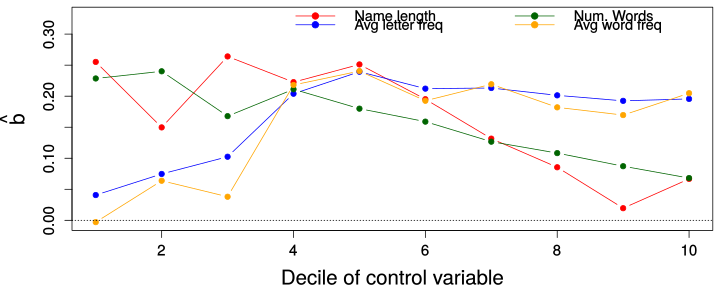

In [19]:
load("Amazon-rundata/lingControls.RData")  #lingdf

options(repr.plot.width=10, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')
par(mar=c(4,5,0.5,0.5))

f <-lingdf$ctype=="nameLen"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
plot(mids, ests, col="red", type="b", xlab="Decile of control variable", ylab=expression(hat(b)), cex.lab=1.7, pch=19, ylim=c(min(lingdf$est), max(lingdf$est)*1.25), cex.axis=1.25)

f <-lingdf$ctype=="avgLetterFreq"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="blue", type="b", pch=19)

f <-lingdf$ctype=="nwords"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="darkgreen", type="b", pch=19)

f <-lingdf$ctype=="avgWordFreq"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="orange", type="b", pch=19)

legend(x="top",legend=c("Name length","Avg letter freq"), col=c("red", "blue"), pch=19, lwd=1, box.lwd=-1, cex=1.2)
legend(x="topright",legend=c("Num. Words","Avg word freq"), col=c("darkgreen", "orange"), pch=19, lwd=1, box.lwd=-1, cex=1.2)

abline(h=0, lty=3)

In [9]:
strat <- Stratify(df, df$nR, nbins=10)
strat <- cbind(data.frame(ctype=rep("nR", 10)), strat)

stratpre <- Stratify(df, df$salesrank, nbins=10)
stratpre <- cbind(data.frame(ctype=rep("salesrank", 10)), stratpre)
strat <- rbind(strat, stratpre)

stratpre <- Stratify(df, df$price, nbins=10)
stratpre <- cbind(data.frame(ctype=rep("price", 10)), stratpre)
strat <- rbind(strat, stratpre)

save(strat, file="Amazon-rundata/OtherControls.RData")

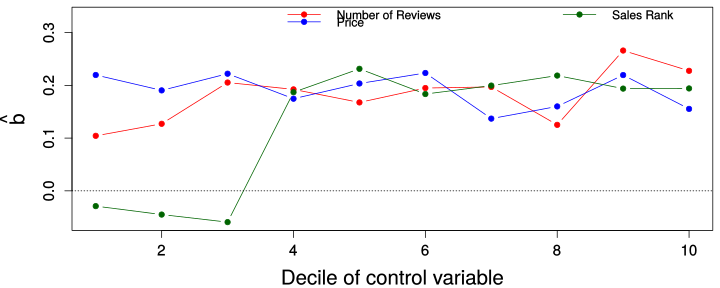

In [20]:
par(mar=c(4,5,0.5,0.5))

options(repr.plot.width=10, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')
load("Amazon-rundata/OtherControls.RData")  #strat

f <-strat$ctype=="nR"
mids <- strat$mid[f]; ests <- strat$est[f];
plot(mids, ests, col="red", type="b", xlab="Decile of control variable", ylab=expression(hat(b)), cex.lab=1.7, pch=19, ylim=c(min(strat$est), max(strat$est)*1.25), cex.axis=1.25)

f <-strat$ctype=="price"
mids <- strat$mid[f]; ests <- strat$est[f];
lines(mids, ests, col="blue", type="b", pch=19)

f <-strat$ctype=="salesrank"
mids <- strat$mid[f]; ests <- strat$est[f];
lines(mids, ests, col="darkgreen", type="b", pch=19)

legend(x="top",legend=c("Number of Reviews","Price"), col=c("red", "blue"), pch=19, lwd=1, box.lwd=-1)
legend(x="topright",legend=c("Sales Rank"), col=c("darkgreen"), pch=19, lwd=1, box.lwd=-1)
abline(h=0, lty=3)